In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [9]:
import pandas as pd
#Load the dataset
data = pd.read_csv("medical_students_dataset.csv")

#Display first few rows
print("First 5 rows of the dataset:")
data.head()


First 5 rows of the dataset:


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [10]:
#Dataset information
print("Dataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116688 entries, 0 to 116687
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      105043 non-null  float64
 1   Age             105092 non-null  float64
 2   Gender          105106 non-null  object 
 3   Height          105013 non-null  float64
 4   Weight          105048 non-null  float64
 5   Blood Type      105091 non-null  object 
 6   BMI             104950 non-null  float64
 7   Temperature     105007 non-null  float64
 8   Heart Rate      105046 non-null  float64
 9   Blood Pressure  104940 non-null  float64
 10  Cholesterol     105048 non-null  float64
 11  Diabetes        104966 non-null  object 
 12  Smoking         104925 non-null  object 
dtypes: float64(9), object(4)
memory usage: 11.6+ MB


In [11]:
#Summary statistics
print("Summary Statistics:")
data.describe()


Summary Statistics:


,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,105043.000000,105092.000000,105013.000000,105048.000000,104950.000000,105007.000000,105046.000000,104940.000000,105048.000000
mean,43999.403996,26.017832,174.924638,69.981894,23.345815,98.600790,79.494698,114.547065,184.582343
std,30494.507653,4.892607,14.448510,17.330627,7.037506,0.500829,11.547256,14.398562,37.582304
min,1.000000,18.000000,150.000329,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,14574.000000,22.000000,162.426492,54.978319,17.870062,98.264685,70.000000,102.000000,152.000000
50%,41546.000000,26.000000,174.861568,70.000978,22.675247,98.599948,79.000000,115.000000,184.000000
75%,70792.500000,30.000000,187.445555,84.993649,28.000440,98.940484,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [ ]:
#Check missing values
print("\nMissing Values (%):")
(data.isnull().sum() / len(data)) * 100



Missing Values (%):


,0
Student ID,0.0
Age,0.0
Height,0.0
Weight,0.0
BMI,0.0
Temperature,0.0
Heart Rate,0.0
Blood Pressure,0.0
Cholesterol,0.0


In [ ]:
#Handle missing values
missing_info = data.isnull().sum() / len(data) * 100

for column in data.columns:
    if missing_info[column] > 10:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data.dropna(subset=[column], inplace=True)

print("\nMissing values after processing:")
data.isnull().sum()



Missing values after processing:


,0
Student ID,0
Age,0
Height,0
Weight,0
BMI,0
Temperature,0
Heart Rate,0
Blood Pressure,0
Cholesterol,0


In [ ]:
#Separate features and target (LAST column as target)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (50793, 8)
Target shape: (50793,)


In [ ]:
#Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


y = y.astype(np.int64)

print("y dtype:", y.dtype)



y dtype: int64


In [ ]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)

    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

print("y_train dtype:", y_train.dtype)


y_train dtype: int64


In [ ]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have same dimensions")

    return np.sqrt(np.sum((point1 - point2) ** 2))


In [ ]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]

    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]

    nearest_labels = y_train[nearest_indices].astype(int)

    prediction = np.bincount(nearest_labels).argmax()
    return prediction


In [ ]:
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [ ]:
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100


In [ ]:
#Test model
#Taking only 50 samples
X_test_sample = X_test[:50]
y_test_sample = y_test[:50]

predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test_sample, predictions)

print(f"Accuracy (Unscaled Data): {accuracy:.2f}%")



Accuracy (Unscaled Data): 4.00%


In [ ]:
def min_max_scaling(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [ ]:

X_small = X[:200]
y_small = y[:200]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_small, y_small)
predictions_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, predictions_scaled)
print(f"Accuracy (Scaled Data): {accuracy_scaled:.2f}%")



Accuracy (Scaled Data): 1.67%


In [ ]:
import matplotlib.pyplot as plt
import time

#Use small subset for fast computation
X_train_small, X_test_small = X_train[:200], X_test[:50]
y_train_small, y_test_small = y_train[:200], y_test[:50]

#Predict on the small subset
preds_small = knn_predict(X_test_small, X_train_small, y_train_small, k=3)

#Compute accuracy
print("Accuracy on small subset:", compute_accuracy(y_test_small, preds_small))

k_values = range(1, 16)

acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    #Original data
    start = time.time()
    preds_small = knn_predict(X_test_small, X_train_small, y_train_small, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test_small, preds_small))

    #Scaled data
    start = time.time()
    preds_small_s = knn_predict(X_test_s[:50], X_train_s[:200], y_train_s[:200], k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_s[:50], preds_small_s))



Accuracy on small subset: 0.0


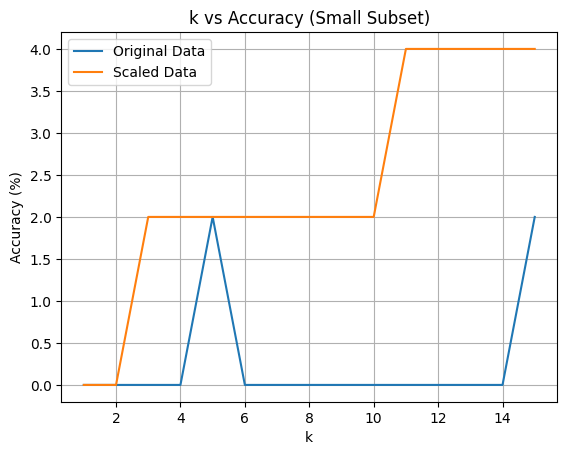

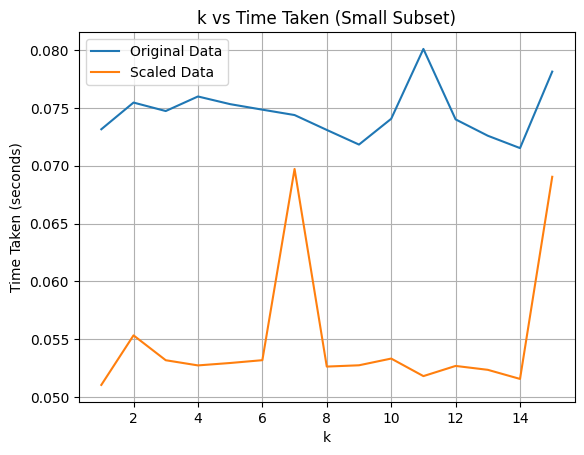

In [ ]:
plt.plot(k_values, acc_original, label="Original Data")
plt.plot(k_values, acc_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy (Small Subset)")
plt.legend()
plt.grid()
plt.show()

plt.plot(k_values, time_original, label="Original Data")
plt.plot(k_values, time_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken (Small Subset)")
plt.legend()
plt.grid()
plt.show()


Analysis

Scaling improves KNN accuracy.
Small k → high variance
Large k → smoother but slower
Optimal k observed around 5-9.
Scaled data is more reliable